<a href="https://colab.research.google.com/github/bedLad/ML-project/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary dependencies

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Make a data frame and analyse it

In [5]:
car_data = pd.read_csv("/content/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Catergorial Columns(Text values) to numerical values

In [7]:
# encoding the data
car_data.replace({"Fuel_Type" : {"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)
car_data.replace({"Seller_Type" : {"Dealer":0, "Individual":1}}, inplace=True)
car_data.replace({"Transmission" : {"Manual":0, "Automatic":1}}, inplace=True)

In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training and test data

In [10]:
X = car_data.drop(["Car_Name", "Selling_Price"], axis=1)
Y = car_data["Selling_Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training

**Linear Regression**

In [11]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [23]:
# prediction of model on a training data
pred = lr.predict(X_test)

In [13]:
print(pred)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [14]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [24]:
print(metrics.r2_score(Y_test, pred))
print(metrics.mean_squared_error(Y_test, pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))

0.8365766715027051
2.1501299189836294
1.4663321311979867


Visualize the actual prize and Predicted price

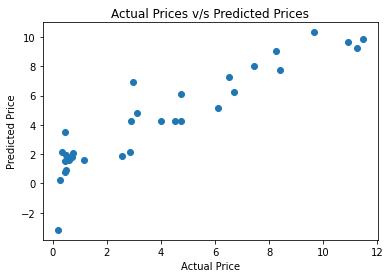

In [26]:
plt.scatter(Y_test, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

In [27]:
las = Lasso()
las.fit(X_train, Y_train)

Lasso()

In [30]:
p = las.predict(X_test)

In [31]:
print(p)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [32]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [33]:
print(metrics.r2_score(Y_test, p))
print(metrics.mean_squared_error(Y_test, p))
print(np.sqrt(metrics.mean_squared_error(Y_test, p)))

0.8709167941173195
1.6983234006965484
1.3031973759552113


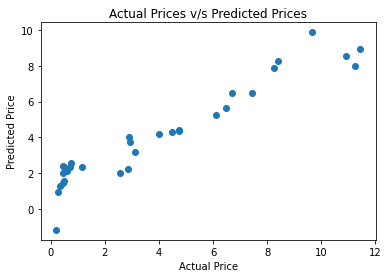

In [35]:
plt.scatter(Y_test, p)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()